In [33]:
import math
import itertools

import numpy as np
from numpy import random
from numpy.random import Generator, PCG64

import scipy.stats

from fractal_ml import generate_direction_fractal, approx_box_counting

import matplotlib.pyplot as plt

In [2]:
def convert_base(x, base=2, precision=1000):
    x = x - int(x)
    exponents = range(-1, (-precision - 1) * 2, -1)
    for e in exponents:
        d = int(x // (base ** e))
        x -= d * (base ** e)
        yield d
        if x == 0: break

In [3]:
def cantor_sample(precision=100):
    # Uses the bijection between [0, 1] and the Cantor set that takes x in [0, 1] in binary form, replaces the 1's with 2's
    # and reinterprets it as a ternary number.
    x = random.rand()
    base = convert_base(x, 2, precision)
    
    #converts the binary form to ternary and evaluates it as a real number.
    val = sum(2*d * (3 ** (-i - 1)) for i, d in enumerate(convert_base(x)))
    return val

In [4]:
def sierpinski_sample(precision=100):
    # Takes a random number in [0, 1] and uses it to navigate the Left/Top/Right tree.
    x = random.rand()
    s_x, s_y = 0, 0
    path = convert_base(x, 3, precision)
    exp = 1
    for p in path:
        exp -= 1
        if p == 0:
            pass
        elif p == 1:
            s_x += 0.25 * 2 ** exp
            s_y += 0.5 * 2 ** exp
        elif p == 2:
            s_x += 0.5 * 2 ** exp
    return s_x, s_y

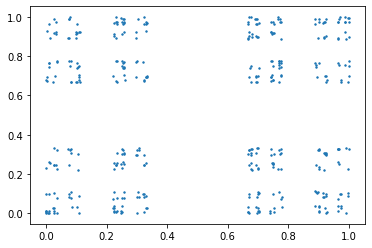

In [18]:
data = np.array([(cantor_sample(), cantor_sample()) for _ in range(400)])
x, y = data.T
plt.scatter(x, y, s=2)
plt.show()

In [35]:
def fractal_dim(base, exp_low, exp_high, data):
    counts = approx_box_counting(base, exp_low, exp_high, data)
    data = np.array([[exp_low + i, np.log(counts[i])] for i in range(len(counts))])
    return data
    
data = np.array([(cantor_sample(), cantor_sample()) for _ in range(5000)])

y =  -0.32081631945404243 x +  1.0366702998842479
0.9728648243687443 1.498848475622454e-07


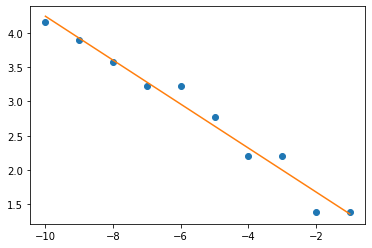

In [47]:
counts = fractal_dim(1.2618, -10, 0, data)
x, y = counts[:,0], counts[:,1]
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
plt.plot(x, y, 'o')
plt.plot(x, m*x+b)
print("y = ", m, "x + ", b)
print(r_value**2, p_value)

In [17]:
counts

array([[-10.        ,   0.75495693],
       [ -9.        ,   0.83884104],
       [ -8.        ,   0.94346838],
       [ -7.        ,   1.07756372],
       [ -6.        ,   1.25183136],
       [ -5.        ,   1.46774852],
       [ -4.        ,   1.64072433],
       [ -3.        ,   1.70309646],
       [ -2.        ,   1.72225892],
       [ -1.        ,   1.77124375]])